# Atractor de Halvorsen
### Proyecto realizado por:
* Angélica Vanegas García: 1000290572
* Elizabeth Jimenez Rincón: 1040870814

El atractor de Halvorsen es un ejemplo de un sistema dinámico que exhibe simetría cíclica y produce resultados interesantes utilizando un único parámetro de entrada. Es conservativo en el espacio de fase, lo que significa que conserva el volumen, y también es reversible en el tiempo, incluso cuando no se puede derivar a partir de un Hamiltoniano evidente.

El estudio de sistemas caóticos es de gran importancia en diversas áreas científicas. La teoría del caos ha revelado patrones complejos en fenómenos aparentemente caóticos y ha impulsado avances en disciplinas como la física, la biología, la medicina, las ciencias sociales y más. Estos sistemas nos permiten comprender mejor la complejidad, formular modelos de predicción, diseñar sistemas estables y también han encontrado aplicaciones en criptografía y seguridad.

Las ecuaciones que modelan este sistema son:

$$\frac{dx}{dt} = -ax-4y-4z-y^2\\
\frac{dy}{dt} = -ay -4z-4x-z^2\\
\frac{dz}{dt} = -az-4x-4y-x^2$$

Y las condiciones iniciales que usaremos serán:
$$a=1.4,x_0=1, y_0 = 0, z_0 = 0, tf = 100$$

Aunque más adelante observaremos como varía para diferentes constantes a, para $ a \in [1.3,2]$

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import plotly.graph_objects as go
import sympy as sy

In [44]:
#condiciones inciales y constante a
a = 1.4
x_0 = 1
y_0 = 0
z_0 = 0
t = np.linspace(0, 100, 100000)
condiciones_iniciales = np.array([x_0, y_0, z_0])

In [45]:
constantes_a =  np.linspace(1.3, 2, 5) #la constante no puede salirse de este rango

In [46]:
#@title Definimos la función para el sistema de ecuaciones

def atractor_halvorsen(condiciones_iniciales, t, a):
  x, y, z = condiciones_iniciales

  dxdt = - a*x - 4*y - 4*z - y**2
  dydt = - a*y - 4*z - 4*x - z**2
  dzdt = - a*z - 4*x - 4*y - x**2

  return dxdt, dydt, dzdt

In [47]:
# @title Lo solucionamos usando odeint
solucion = odeint(atractor_halvorsen, condiciones_iniciales, t, args = (a,))

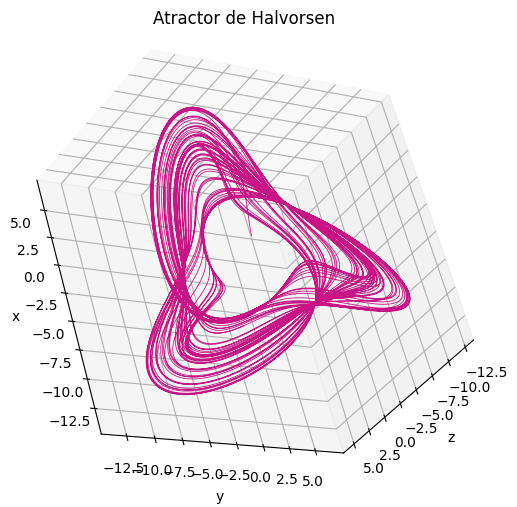

In [48]:
fig = plt.figure(figsize=(6, 7))
ax = fig.add_subplot(111, projection = "3d")
ax.plot(solucion[:, 0], solucion[:, 1], solucion[:, 2], linewidth = 0.6, color = "mediumvioletred")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(-140, 50, -45)
#Porque la gráfica aparece "torcida"
plt.title("Atractor de Halvorsen")
plt.draw()
plt.show()

In [49]:
x, y, z = solucion.T

In [50]:
#@title Realizamos una figura interactiva para visualizar mejor el atractor
fig = go.Figure(data=go.Scatter3d(
    x=x, y=y, z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='inferno',
    ),
    line=dict(
        color='darkblue',
        width=0.05
    )
))

fig.show()

In [51]:
#@title Definimos una función que calcule y grafique varias soluciones al sistema de ecuaciones diferenciales
def atractores(atractor_halvorsen, condiciones_iniciales, t, a):
  solucion1 = odeint(atractor_halvorsen, condiciones_iniciales, t, args = (a,))
  fig = plt.figure(figsize=(2, 5))
  ax = fig.add_subplot(111, projection = "3d")
  ax.plot(solucion1[:, 0], solucion1[:, 1], solucion1[:, 2], linewidth = 0.6, color = "mediumvioletred")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  ax.view_init(-140, 50, -45)
  #Porque la gráfica aparece "torcida"
  plt.title("Atractor de Halvorsen con a: " + str(a))
  plt.draw()
  plt.show()

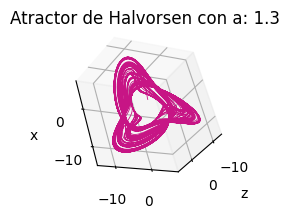

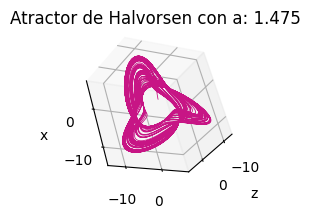

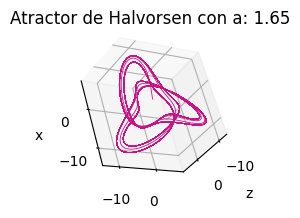

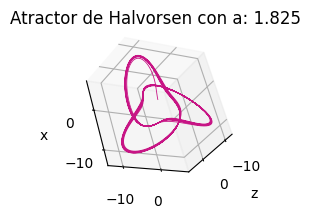

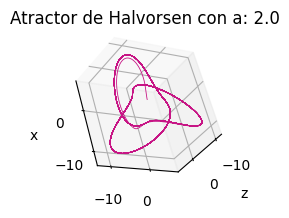

In [52]:
#@title Atractor de Halvorsen cambiando el valor de la constante a

for i in constantes_a:
  atractores(atractor_halvorsen, condiciones_iniciales, t, i)


Y aunque pareciese que la densidad de las líneas cambiara según a aumenta, lo que sucede es que la separación entre estas disminuye, por lo que no podemos notar la diferencia

In [53]:
def solucionf(a):
  solucion = odeint(atractor_halvorsen, condiciones_iniciales, t, args = (a,))
  x,y,z = solucion.T
  return x,y,z

In [54]:
# @title Aquí deseabamos generalizarlo para que funcionara con un slider, pero colab es vago y se negó a intentarlo

fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    x,y,z =solucionf(step)
    fig.add_trace(
      go.Scatter3d(
        x=x, y=y, z=z,
        marker=dict(
            size=4,
            color=z,
            colorscale='Viridis',
        ),
        line=dict(
            color='darkblue',
            width=0.05
        )
    ))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=1.1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 2},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



Usando manim para crear una animación del proceso, encontramos otro problema. Tenemos la solución discretizada al hacerla mediante métodos númericos, y las gráficas en manim funcionan de forma símbolica, por lo que tuvimos que hacerlo punto a punto, lo cuál requirío mucha más capacidad computacional. Grafica alrededor de un punto cada minuto. Lo pusimos a correr con mil puntos, y pasadas 3 horas tan solo lleva 500 puntos, pero llegado a este punto podemos esperar qué sucede.
El código usado en manim fue el siguiente:
Si mañana aun no termina de correr, le bajaremos los puntos y mostraremos una versión [simplificada](https://github.com/Elizajr/CursoMetodosComputacionales/blob/7379a5d82974f094f82c43e14d09e13d8201f5d3/Students/Jim%C3%A9nez_814/Proyecto/Animaci%C3%B3n%20manim%20100%20puntos.mp4).


```
class grafica(ThreeDScene):
    def construct(self):

        # Eje coordenado

        ax =ThreeDAxes(
                x_range = [-12.5, 5, 1],
                y_range = [-12.5, 5, 1],
                z_range = [-12.5, 5, 1],
                )
                

        labels = ax.get_axis_labels(
            Tex("x ").scale(0.7), Text("y").scale(0.45), Text("z").scale(0.45)
        )

        #graph = ax.get_scatterplot(sol[:,0],sol[:,1],sol[:,2])
        #graph0 = ax.plot(x,y,z)
        self.set_camera_orientation(phi=2*PI/5, theta=PI/5)
        self.add(ax,labels)
        for i in range(round((len(x)/100))):
          dot = Dot3D(point = ax.coords_to_point(x[100*i],y[100*i],z[100*i]), color = PINK)
          self.play(Create(dot))
```



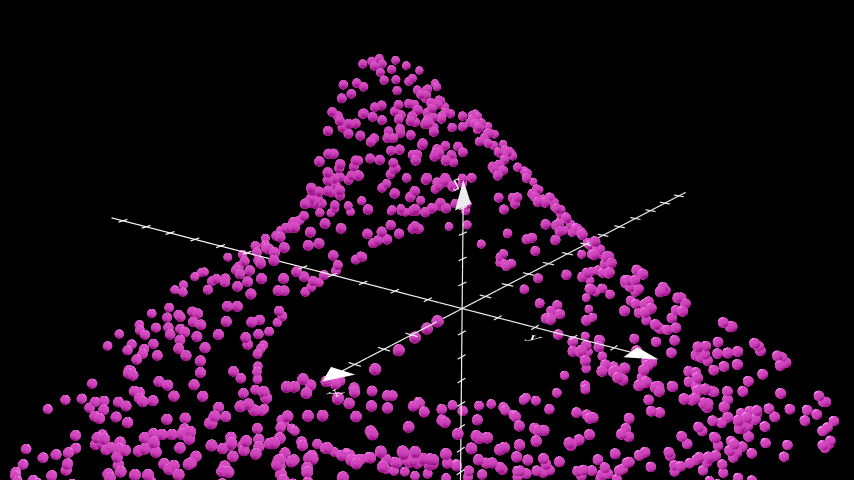